<h3> Problem Link : </h3>

https://www.scaler.com/academy/mentee-dashboard/class/42351/project/problems/17748?navref=cl_tt_lst_nm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3> Initial Exploration </h3>

In [3]:
data = pd.read_csv("netflix.csv")
data.head(8)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [336]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [337]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [338]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [339]:
data.describe(include = ["object"]).T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [340]:
#We do not require description for our analysis for now. However, it can be used using NLP to generate recommendations
data.drop("description", axis = 1, inplace = True)
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"


<br> --------------------------------------------------------------------------------------------------------------------------
<h3> Problems Encountered </h3>
<ol>
    <li>Nested Data - Director, Cast, Country, Listed_In</li>
    <li>Missing Values</li>
    <li>Unstructured Data (Duration column)</li>
    <li>Date_added column has dates in multiple formats</li>
    <li>Tabular Representation tough to understand</li>
</ol>
<h3> Solutions </h3>
<ol>
    <li>Split Data using str.split(",") then use hstack to create multiple dataframes and finally use merge
        <b> OR </b> we can use melt and pivot too</li>
    <li>Instead of dropping missing values, we will try to keep most data intact by replacing NaN's with groupby-mode ooperation. Also, rows where we have empty string " " need to be converted to np.nan</li>
    <li>Duration needs to be divided into minutes for movies and seasons for TV shows. To find aggregates, we can perform groupby + agg</li>
    <li>Converting Date to Datetime</li>
    <li>Generate insights using charts</li>
</ol>
<h3> Order of Execution </h3>
We will perform all the steps that are not dependent on the values present in nested data columns. Therefore, no grouby operations. The operations are as follows <br>
<ul>
    <li> Standardizing date_time columns </li>
    <li> Checking and removing null values of columns which don't depend on value of other columns </li>
    <li> Structuring duration column </li>
    <li> De-nesting data </li>
    <li> Removing null-values and generating insighs based on de-nested data </li>
</ul>

<h4> Standardizing date_added column </h4>

In [341]:
data["date_added"] = pd.to_datetime(data["date_added"]).dt.strftime('%d-%m-%Y')
data["release_year"] = pd.to_datetime(data["release_year"], format = "%Y").dt.strftime("%Y")
# IMP --> strftime converts the datatype of the whole column back to object (string), therefore we need to convert
# the column's datatype back to datetime
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-09-2021,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-09-2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-09-2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-09-2021,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-09-2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-11-2019,2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,01-07-2019,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,01-11-2019,2009,R,88 min,"Comedies, Horror Movies"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-01-2020,2006,PG,88 min,"Children & Family Movies, Comedies"


<h4> Empty string check </h4>

In [342]:
data.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
dtype: int64

In [343]:
def check_empty_strings(df): 
    for col_name in df.columns:
        print("\ncol_name:", col_name, ", nan_values:", df[col_name].isna().sum(), ", not-nan values:", df[col_name].count())
             
        if (df[col_name].isna().sum() + df[col_name].count() != 8807):
            return ("Empty strings found in column:", col_name)
        else:
            pass
    
    return "\nNo empty strings found"

print(check_empty_strings(data))


col_name: show_id , nan_values: 0 , not-nan values: 8807

col_name: type , nan_values: 0 , not-nan values: 8807

col_name: title , nan_values: 0 , not-nan values: 8807

col_name: director , nan_values: 2634 , not-nan values: 6173

col_name: cast , nan_values: 825 , not-nan values: 7982

col_name: country , nan_values: 831 , not-nan values: 7976

col_name: date_added , nan_values: 10 , not-nan values: 8797

col_name: release_year , nan_values: 0 , not-nan values: 8807

col_name: rating , nan_values: 4 , not-nan values: 8803

col_name: duration , nan_values: 3 , not-nan values: 8804

col_name: listed_in , nan_values: 0 , not-nan values: 8807

No empty strings found


<h4> Duplicate value check </h4>

In [344]:
data[data.duplicated(subset=['show_id', 'title'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in


<h4> Filling "date_added" null values </h4>

In [345]:
data.loc[data["date_added"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies"
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies"
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows"
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies"


In [346]:
missing_locs = data.loc[data["date_added"].isnull()]
data["date_added"].fillna(value = pd.to_datetime(data["release_year"]).dt.strftime("%d-%m-%Y"), axis = 0, inplace=True)
data[data["date_added"].index.isin(missing_locs.index)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,01-01-2013,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,01-01-2018,2018,TV-PG,5 Seasons,Docuseries
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,01-01-2003,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies"
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,01-01-2003,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies"
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,01-01-2008,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows"
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,01-01-2010,2010,TV-Y,2 Seasons,Kids' TV
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,01-01-2012,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,01-01-2016,2016,TV-MA,4 Seasons,TV Comedies
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,01-01-2015,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,01-01-2015,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies"


In [347]:
# Now that release year and date_added columns have been standardized, we can convert them back to datetime format 
# We need to do this since strftime converts the columns to string objects
data["date_added"] = pd.to_datetime(data["date_added"], format = "%d-%m-%Y")
data["release_year"] = pd.to_datetime(data["release_year"], format = "%Y")
data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year    datetime64[ns]
rating                  object
duration                object
listed_in               object
dtype: object

<h4> Filling "duration" null values </h4>

In [348]:
data.loc[data["duration"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017-01-01,74 min,NaN,Movies
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010-01-01,84 min,NaN,Movies
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015-01-01,66 min,NaN,Movies


In [349]:
missing_locs = data.loc[data["duration"].isnull()]
data["duration"].fillna(value = data["rating"], axis = 0, inplace = True) #duration values are in rating col
data["rating"].loc[data.index.isin(missing_locs.index)] = np.nan #replacing rating col values with NaN
data[data.index.isin(missing_locs.index)]

C:\Users\Mrudul\AppData\Local\Temp\ipykernel_1604\181485828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["rating"].loc[data.index.isin(missing_locs.index)] = np.nan #replacing rating col values with NaN


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017-01-01,NaN,74 min,Movies
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010-01-01,NaN,84 min,Movies
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015-01-01,NaN,66 min,Movies


<h4> Diving dataframe into movies and tv shows </h4>

Movies and TV-Shows have a lot of differences so it makes sense to divide the dataframe into these parts
<br> Therefore, we will first divide the shows between TV_shows and Movies

In [350]:
data["type"].value_counts(normalize = True)*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

In [351]:
movies = data[data["type"] == "Movie"]
movies.head(8)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021-01-01,PG,91 min,Children & Family Movies
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993-01-01,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021-01-01,PG-13,104 min,"Comedies, Dramas"
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021-01-01,TV-MA,127 min,"Dramas, International Movies"
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",NaN,2021-09-22,2021-01-01,TV-PG,91 min,"Children & Family Movies, Comedies"
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,2021-09-22,2020-01-01,TV-MA,67 min,"Documentaries, International Movies"
18,s19,Movie,Intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",NaN,2021-09-22,2021-01-01,TV-14,94 min,Thrillers


In [352]:
tv_shows = data[data["type"] == "TV Show"]
tv_shows.head(8)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021-01-01,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021-01-01,TV-14,9 Seasons,"British TV Shows, Reality TV"
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S..."
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,2021-09-23,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


In [353]:
movies["duration"] = movies["duration"].str.split("min").str[0]
# ALT --> movies[‘duration’].str.split(expand=True)[0]
movies["duration"] = movies["duration"].astype("int32")
movies.head(3)

C:\Users\Mrudul\AppData\Local\Temp\ipykernel_1604\902548781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["duration"] = movies["duration"].str.split("min").str[0]
C:\Users\Mrudul\AppData\Local\Temp\ipykernel_1604\902548781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["duration"] = movies["duration"].astype("int32")


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020-01-01,PG-13,90,Documentaries
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021-01-01,PG,91,Children & Family Movies
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993-01-01,TV-MA,125,"Dramas, Independent Movies, International Movies"


In [354]:
tv_shows["duration"] = tv_shows["duration"].str.split("Season").str[0]
# ALT --> tv_shows[‘duration’].str.split(expand=True)[0]
tv_shows["duration"] = tv_shows["duration"].astype("int32")
tv_shows.head(3)

C:\Users\Mrudul\AppData\Local\Temp\ipykernel_1604\1726177719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows["duration"] = tv_shows["duration"].str.split("Season").str[0]
C:\Users\Mrudul\AppData\Local\Temp\ipykernel_1604\1726177719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows["duration"] = tv_shows["duration"].astype("int32")


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021-01-01,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021-01-01,TV-MA,1,"Docuseries, Reality TV"


<h4> Filling null-values in "rating" column </h4>

In [355]:
movies[movies["rating"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017-01-01,NaN,74,Movies
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010-01-01,NaN,84,Movies
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015-01-01,NaN,66,Movies
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,2017-01-01,NaN,37,Movies
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015-01-01,NaN,115,Dramas


In [356]:
movies[movies["director"].isin(["Louis C.K.", "Alessandro Pepe"])]
# As we can see, we don't have any other rows to reference rating from, so we will directly replce rating by mode

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017-01-01,NaN,74,Movies
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010-01-01,NaN,84,Movies
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015-01-01,NaN,66,Movies
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015-01-01,NaN,115,Dramas


In [357]:
mode = movies["rating"].mode()[0]
mode

'TV-MA'

In [358]:
missing_locs = movies[movies["rating"].isnull()]
movies["rating"].fillna(value = mode, axis=0, inplace=True)
movies.loc[movies.index.isin(missing_locs.index)]

C:\Users\Mrudul\AppData\Local\Temp\ipykernel_1604\2872612556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["rating"].fillna(value = mode, axis=0, inplace=True)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017-01-01,TV-MA,74,Movies
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010-01-01,TV-MA,84,Movies
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015-01-01,TV-MA,66,Movies
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,2017-01-01,TV-MA,37,Movies
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015-01-01,TV-MA,115,Dramas


In [359]:
tv_shows[tv_shows["rating"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013-01-01,NaN,1,"Anime Series, International TV Shows"
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015-01-01,NaN,1,"Kids' TV, TV Comedies"


In [360]:
missing_locs = tv_shows.loc[tv_shows["rating"].isnull()]
tv_shows["listed_in"].str.split(", ")
exploded_df = tv_shows.explode("listed_in")
exploded_df[exploded_df["rating"].isnull()]["listed_in"].tolist()

['Anime Series, International TV Shows', "Kids' TV, TV Comedies"]

In [361]:
grouped_tv = exploded_df.groupby("listed_in").agg({"rating" : pd.Series.mode})
grouped_tv.loc[exploded_df[exploded_df["rating"].isnull()]["listed_in"].tolist()].reset_index()

,listed_in,rating
0,"Anime Series, International TV Shows",TV-14
1,"Kids' TV, TV Comedies",TV-Y7


In [362]:
tv_shows.loc[6827, 'rating'] = "TV-14"
tv_shows.loc[7312, 'rating'] = "TV-Y7"
tv_shows[tv_shows.index.isin(missing_locs.index)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013-01-01,TV-14,1,"Anime Series, International TV Shows"
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015-01-01,TV-Y7,1,"Kids' TV, TV Comedies"


<h2> De-nesting dataframe </h2>

To fill other null values , we can't directly take the mean/mode of the whole column and fill them. We must find shows with similar characteristics and then take their mean. Also, to generate insights, we need to de-nest the dataframe. 

In [7]:
def de_nester(df, nested_col_name):
    #Creates a completely new dataframe and returns it without modifying the old dataframe
    
    exploded_df = pd.concat([df.drop(nested_col_name, axis = 1, inplace=False), 
                         df[nested_col_name].str.split(",")], axis = 1).explode(nested_col_name).drop_duplicates()
    
    exploded_df[nested_col_name] = exploded_df[nested_col_name].str.lstrip().str.rstrip() #removes whitespaces
    
    return exploded_df

In [364]:
# tv_shows["director"] = tv_shows["director"].str.split(", ")
# tv_shows["cast"] = tv_shows["cast"].str.split(", ")
# tv_shows["country"] = tv_shows["country"].str.split(", ")
# tv_shows["listed_in"].str.split(", ")
# tv_shows

<h4> Filling Cast, Director and Country Missing columns </h4>
<br> To fill up these columns, let us check if can we find correlation of these columns to other columns
<br> IMP LINKS: 
<ol>
    <li> https://stackoverflow.com/questions/41710789/boolean-series-key-will-be-reindexed-to-match-dataframe-index </li>
    <li> https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe </li>    
    <li> https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns </li>
</ol>

In [365]:
movies_denested = de_nester(movies, "listed_in")

temp1 = movies_denested[["listed_in"]][(movies["cast"].isnull())].value_counts().reset_index(name='Null Cast Count')
temp2 = movies_denested[["listed_in"]][(movies["director"].isnull())].value_counts().reset_index(name='Null Director Count')
temp3 = movies_denested[["listed_in"]][(movies["country"].isnull())].value_counts().reset_index(name='Null Country Count')
pd.concat([df.set_index('listed_in') for df in [temp1, temp2, temp3]], axis=1, join='outer')

#pd.merge(temp3, pd.merge(temp1, temp2, on="listed_in", how = "outer"), on = "listed_in", how = "outer")
# movies_denested[["listed_in", "rating"]][(movies["cast"].isnull())].value_counts().reset_index(name = "Null Cast Counts")

# We can see that a lot of movies without a cast or director are actually documentaries, which makes sense 
# as they don't have a defined cast/director

C:\Users\Mrudul\AppData\Local\Temp\ipykernel_1604\1800344805.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp1 = movies_denested[["listed_in"]][(movies["cast"].isnull())].value_counts().reset_index(name='Null Cast Count')
C:\Users\Mrudul\AppData\Local\Temp\ipykernel_1604\1800344805.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp2 = movies_denested[["listed_in"]][(movies["director"].isnull())].value_counts().reset_index(name='Null Director Count')
C:\Users\Mrudul\AppData\Local\Temp\ipykernel_1604\1800344805.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp3 = movies_denested[["listed_in"]][(movies["country"].isnull())].value_counts().reset_index(name='Null Country Count')


,Null Cast Count,Null Director Count,Null Country Count
listed_in,,,
Documentaries,424.0,57.0,75
International Movies,178.0,47.0,209
Sports Movies,54.0,7.0,18
Music & Musicals,35.0,17.0,47
Children & Family Movies,33.0,36.0,106
LGBTQ Movies,17.0,4.0,5
Comedies,12.0,32.0,94
Dramas,11.0,25.0,110
Classic Movies,7.0,NaN,1


In [366]:
tv_show_denested = de_nester(tv_shows, "listed_in")

temp1 = tv_show_denested[["listed_in"]][(tv_shows["cast"].isnull())].value_counts().reset_index(name='Null Cast Count')
temp2 = tv_show_denested[["listed_in"]][(tv_shows["director"].isnull())].value_counts().reset_index(name='Null Director Count')
temp3 = tv_show_denested[["listed_in"]][(tv_shows["country"].isnull())].value_counts().reset_index(name='Null Country Count')
pd.concat([df.set_index('listed_in') for df in [temp1, temp2, temp3]], axis=1, join='outer')

C:\Users\Mrudul\AppData\Local\Temp\ipykernel_1604\1000636975.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp1 = tv_show_denested[["listed_in"]][(tv_shows["cast"].isnull())].value_counts().reset_index(name='Null Cast Count')
C:\Users\Mrudul\AppData\Local\Temp\ipykernel_1604\1000636975.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp2 = tv_show_denested[["listed_in"]][(tv_shows["director"].isnull())].value_counts().reset_index(name='Null Director Count')
C:\Users\Mrudul\AppData\Local\Temp\ipykernel_1604\1000636975.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp3 = tv_show_denested[["listed_in"]][(tv_shows["country"].isnull())].value_counts().reset_index(name='Null Country Count')


,Null Cast Count,Null Director Count,Null Country Count
listed_in,,,
Docuseries,207.0,335,65
International TV Shows,109.0,1223,223
Reality TV,92.0,249,50
Crime TV Shows,75.0,401,49
British TV Shows,45.0,228,16
Kids' TV,42.0,433,81
Science & Nature TV,35.0,88,10
TV Comedies,24.0,539,80
Romantic TV Shows,13.0,341,71


In [333]:
movies["country"].fillna("Unknown Country", inplace = True)
movies["cast"].fillna("Unknown Cast", inplace = True)
movies["director"].fillna("Unknown Director", inplace=True)

tv_shows["country"].fillna("Unknown Country", inplace=True)
tv_shows["cast"].fillna("Unknown Cast", inplace=True)
tv_shows["director"].fillna("Unknown Director", inplace=True)

print(movies.isnull().sum().sum(), tv_shows.isnull().sum().sum())

C:\Users\Mrudul\AppData\Local\Temp\ipykernel_1604\2890977746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["country"].fillna("Unknown Country", inplace = True)
C:\Users\Mrudul\AppData\Local\Temp\ipykernel_1604\2890977746.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["cast"].fillna("Unknown Cast", inplace = True)
C:\Users\Mrudul\AppData\Local\Temp\ipykernel_1604\2890977746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

0 0


<h3> Visual Analysis and Insights </h3>

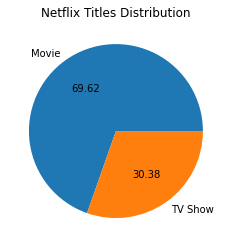

In [183]:
plt.title("Netflix Titles Distribution")
plt.pie(data["type"].value_counts(), labels = data["type"].value_counts().index, autopct="%.2f")
plt.show()

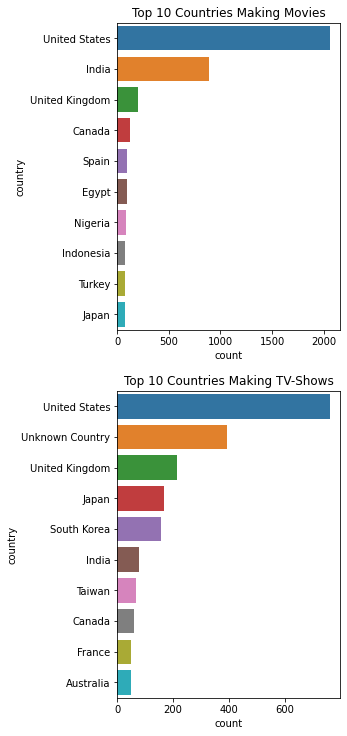

In [184]:
fig, axs = plt.subplots(nrows = 2, ncols = 1 , figsize=(4, 5))

# movies.drop(movies.loc[movies["country"] == "Unknown Country"], axis = 1, inplace = False)
sns.countplot(y = movies["country"], order = movies["country"].value_counts().index[:10], ax = axs[0]).set(
    title="Top 10 Countries Making Movies")
sns.countplot(y = tv_shows["country"], order = tv_shows["country"].value_counts().index[:10], ax = axs[1]).set(
    title="Top 10 Countries Making TV-Shows")

plt.subplots_adjust(top = 2)
plt.show()

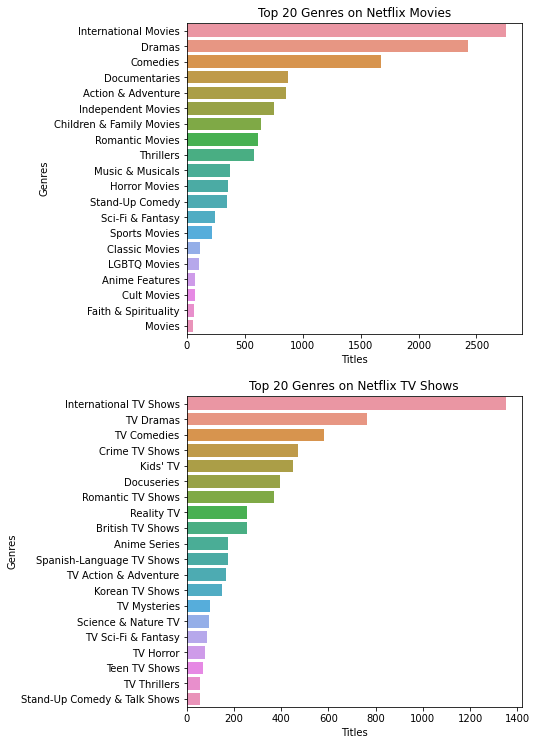

In [185]:
fig, axs = plt.subplots(nrows = 2, ncols = 1 )

denested_genre = de_nester(movies, "listed_in")
sns.countplot(y = denested_genre["listed_in"], order = denested_genre["listed_in"].value_counts().index[:20], ax = axs[0]).set(
    title = 'Top 20 Genres on Netflix Movies', xlabel = 'Titles', ylabel = 'Genres')
denested_genre = de_nester(tv_shows, "listed_in")
sns.countplot(y = denested_genre["listed_in"], order = denested_genre["listed_in"].value_counts().index[:20], ax = axs[1]).set(
    title = 'Top 20 Genres on Netflix TV Shows', xlabel = 'Titles', ylabel = 'Genres')

plt.subplots_adjust(top = 2.5)
plt.show()

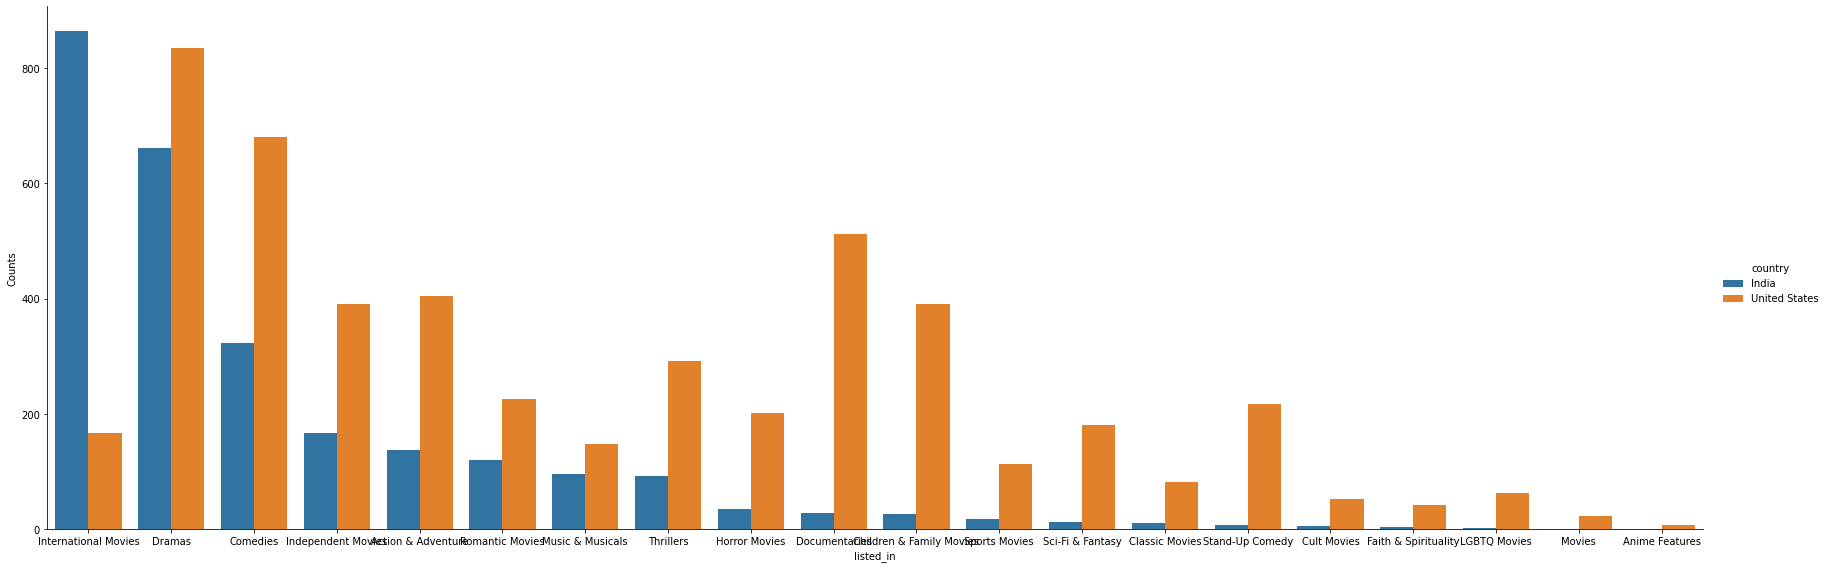

In [186]:
#TOP Movie and TV_Show genres across countries

country_list = ["India", "United States", "United_Kingdom"]
denested_country = de_nester(movies, "country")
filtered_country = denested_country[denested_country["country"].isin(country_list)]
denested_genre = de_nester(filtered_country, "listed_in")
grouped_df = denested_genre.groupby("country")[["listed_in"]].value_counts().reset_index(name='Counts')

sns.catplot(data = grouped_df, x = "listed_in", y = "Counts", hue = 'country', kind='bar', height=8, aspect=3)
# width = aspect * height
plt.show()

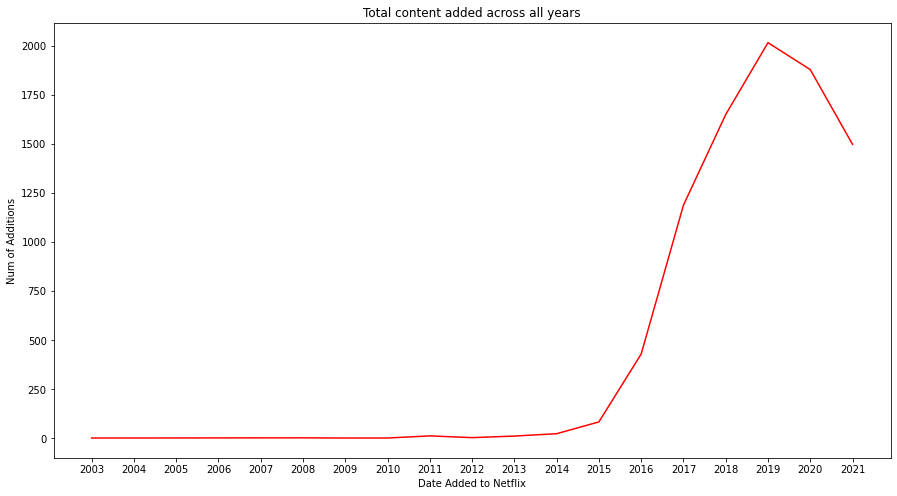

In [412]:
df_years = data.groupby(data["date_added"].dt.year)["type"].size().reset_index(name='counts')
plt.figure(figsize=(15,8))
sns.lineplot(data = df_years, x="date_added", y="counts", color = "red")
plt.xticks(np.arange(2003, 2022, 1))
plt.title("Total content added across all years")
plt.ylabel("Num of Additions")
plt.xlabel("Date Added to Netflix")
plt.show()

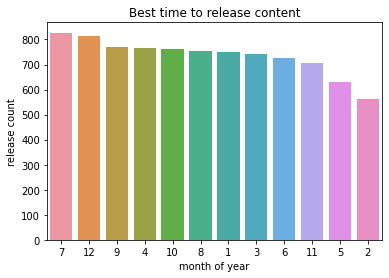

In [45]:
ax = sns.countplot(x = pd.to_datetime(data["date_added"], format = "%d-%m-%Y").dt.month, 
                   order = pd.to_datetime(data["date_added"], format = "%d-%m-%Y").dt.month.value_counts().index)
ax.set(xlabel='month of year', ylabel='release count', title='Best time to release content')
plt.show()

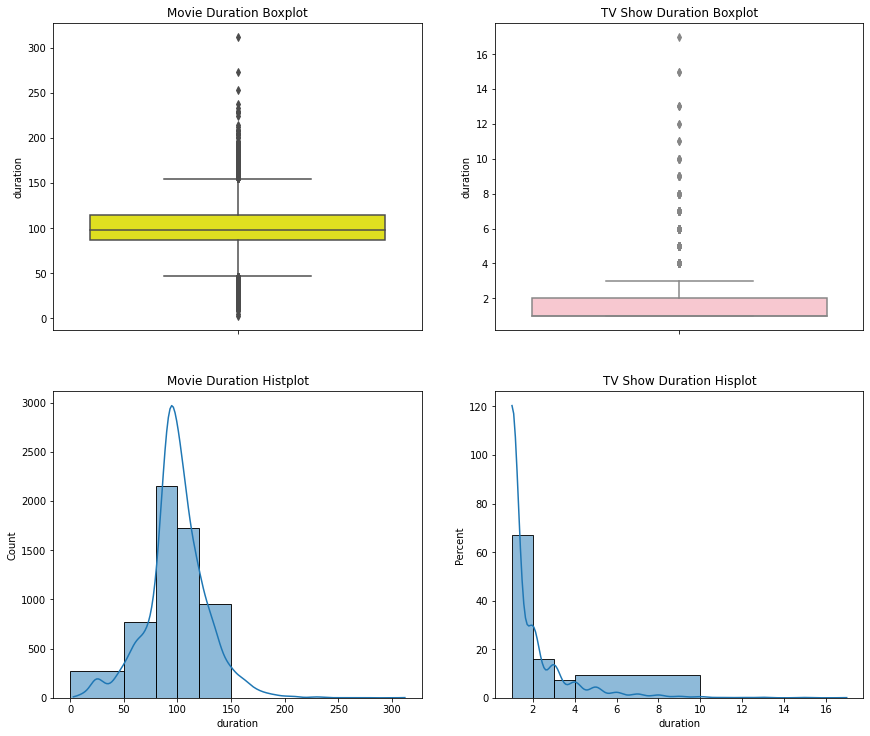

In [939]:
fig, axs = plt.subplots(nrows = 2, ncols = 2 , figsize=(6, 5))
sns.boxplot(y = movies["duration"], ax = axs[0][0], color = "yellow").set(
    title='Movie Duration Boxplot')
sns.boxplot(y = tv_shows["duration"], ax = axs[0][1], color = "pink").set(
    title='TV Show Duration Boxplot')
sns.histplot(movies["duration"], bins = [0, 50, 80, 100, 120, 150], stat = "count", kde = True, ax = axs[1][0]).set(
    title='Movie Duration Histplot')
sns.histplot(tv_shows["duration"], bins = [1, 2, 3, 4, 10], stat = "percent", kde = True, ax = axs[1][1]).set(
    title='TV Show Duration Hisplot')
plt.subplots_adjust(right = 2, top = 2)
plt.show()

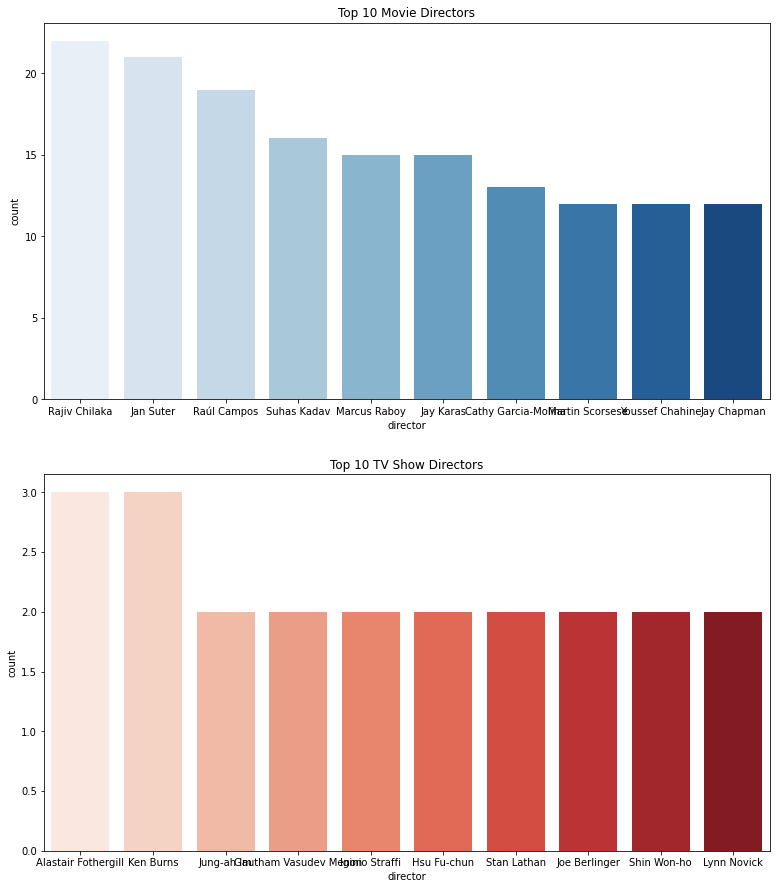

In [376]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize=(13, 4))

denested_directors_movies = de_nester(movies, "director")
denested_directors_movies["director"].dropna(inplace= True)
denested_directors_tv_shows = de_nester(tv_shows, "director")
denested_directors_tv_shows["director"].dropna(inplace= True)

sns.countplot(x = denested_directors_movies["director"] , order = denested_directors_movies["director"].value_counts().index[:10], 
              palette='Blues', ax = axs[0]).set(title = "Top 10 Movie Directors")
sns.countplot(x = denested_directors_tv_shows["director"] , order = denested_directors_tv_shows["director"].value_counts().index[:10], 
              palette='Reds', ax = axs[1]).set(title = "Top 10 TV Show Directors")

plt.subplots_adjust(top = 3)
plt.show()

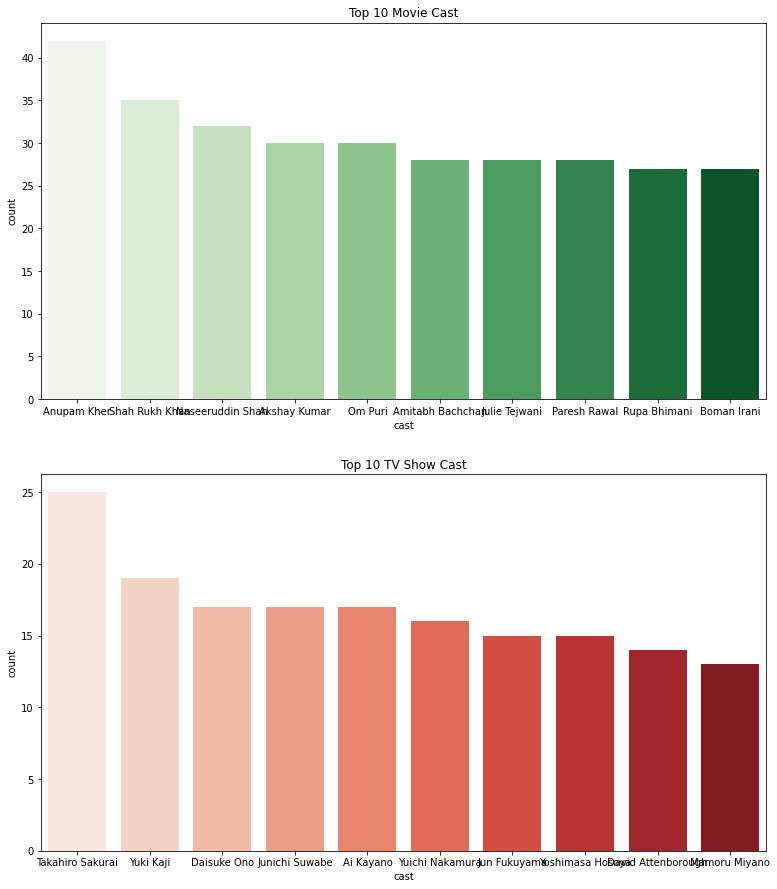

In [419]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize=(13, 4))

denested_cast_movies = de_nester(movies, "cast")
denested_cast_movies["cast"].dropna(inplace= True)
denested_cast_tv_shows = de_nester(tv_shows, "cast")
denested_cast_tv_shows["cast"].dropna(inplace= True)

sns.countplot(x = denested_cast_movies["cast"] , order = denested_cast_movies["cast"].value_counts().index[:10], 
              palette='Greens', ax = axs[0]).set(title = "Top 10 Movie Cast")
sns.countplot(x = denested_cast_tv_shows["cast"] , order = denested_cast_tv_shows["cast"].value_counts().index[:10], 
              palette='Reds', ax = axs[1]).set(title = "Top 10 TV Show Cast")

plt.subplots_adjust(top = 3)
plt.show()

C:\Users\Mrudul\AppData\Local\Temp\ipykernel_1604\1319774375.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_shows = count_shows.append(


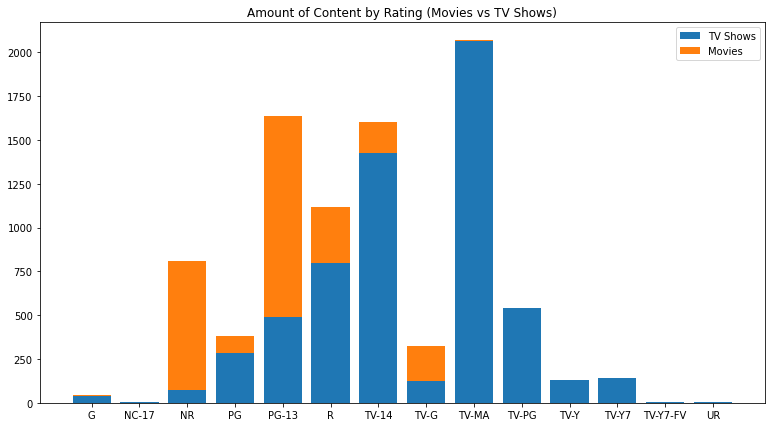

In [425]:
count_movies = movies.groupby('rating')['title'].count().reset_index()
count_shows = tv_shows.groupby('rating')['title'].count().reset_index()
count_shows = count_shows.append(
    [{"rating" : "NC-17", "title" : 0},
     {"rating" : "PG-13", "title" : 0},
     {"rating" : "UR", "title" : 0}, 
     {"rating" : "G", "title" : 0}, 
     {"rating" : "PG", "title" : 0}], ignore_index=True)

#Have to do this as TV shows have more types of ratings than movies
count_shows.sort_values(by="rating", ascending=True)
plt.figure(figsize=(13,7))
plt.title('Amount of Content by Rating (Movies vs TV Shows)')
plt.bar(count_movies.rating, count_movies.title)
plt.bar(count_movies.rating, count_shows.title, bottom=count_movies.title)
plt.legend(['TV Shows', 'Movies'])
plt.show()

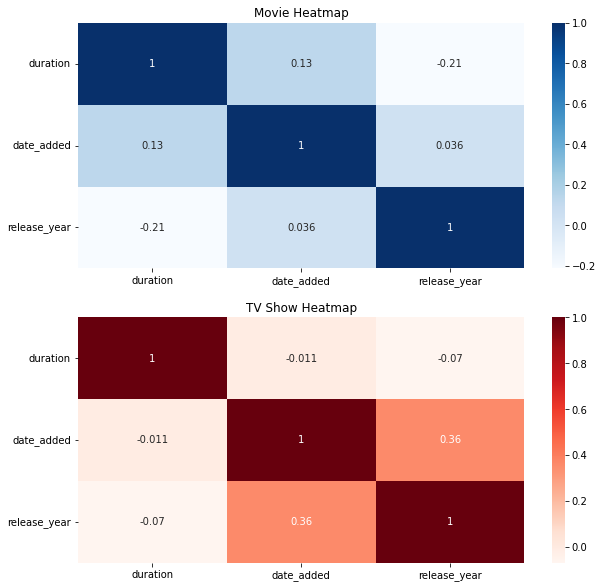

In [434]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize=(10, 4))

heatmap_df_movie = movies[['duration', 'date_added', 'release_year']].drop_duplicates()
heatmap_df_movie["date_added"] = heatmap_df_movie["date_added"].dt.year
heatmap_df_movie["release_year"] = heatmap_df_movie["release_year"].dt.year


heatmap_df_tv_show = tv_shows[['duration', 'date_added', 'release_year']].drop_duplicates()
heatmap_df_tv_show["date_added"] = heatmap_df_tv_show["date_added"].dt.year
heatmap_df_tv_show["release_year"] = heatmap_df_tv_show["release_year"].dt.year

sns.heatmap(data = heatmap_df_movie.corr(), annot=True, cmap='Blues', ax = axs[0]).set(
    title = "Movie Heatmap")
sns.heatmap(data = heatmap_df_tv_show.corr(), annot=True, cmap='Reds', ax = axs[1]).set(
    title = "TV Show Heatmap")

plt.subplots_adjust(top = 2)
plt.show()

<h3> Scaler Assignment Questions </h3>

In [4]:
data["type"].value_counts(normalize=True)

Movie      0.696151
TV Show    0.303849
Name: type, dtype: float64

In [167]:
round(tv_shows["duration"].mean(), 1)

1.8

<AxesSubplot:xlabel='duration', ylabel='Count'>

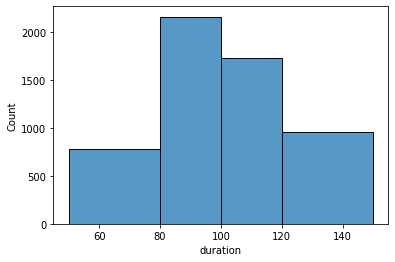

In [183]:
sns.histplot(movies["duration"], bins = [50, 80, 100, 120, 150])

In [527]:
movies["cast"][movies["country"] == "India"].value_counts()

 Anupam Kher      102
 Radhika Apte      74
 Paresh Rawal      73
Shah Rukh Khan     73
Akshay Kumar       70
                 ... 
Amit Tandon         1
 Mousam             1
 Swapnil            1
 Arun Shekher       1
 Rajesh Kawa        1
Name: cast, Length: 3797, dtype: int64

In [592]:
temp["genre"] = data["listed_in"].str.split(", ").explode()
temp.str.contains("Comed").sum()

2654

In [711]:
japanese_data = data[data["country"] == "Japan"]
japanese_data["listed_in"].str.split(", ").explode("listed_in").value_counts()

International TV Shows          141
Anime Series                    131
International Movies             58
Anime Features                   54
Action & Adventure               46
Romantic TV Shows                21
TV Dramas                        20
Crime TV Shows                   15
Teen TV Shows                    14
Kids' TV                         13
Dramas                           12
Children & Family Movies         10
TV Comedies                       7
Reality TV                        6
Sci-Fi & Fantasy                  6
TV Thrillers                      5
TV Horror                         4
TV Action & Adventure             4
TV Mysteries                      4
Music & Musicals                  3
Thrillers                         3
Romantic Movies                   3
Horror Movies                     2
LGBTQ Movies                      1
Docuseries                        1
Movies                            1
Classic Movies                    1
TV Shows                    

In [709]:
temp = tv_shows.dropna("director", axis = 1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-09-2021,2021,TV-MA,2,International TV Shows
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-09-2021,2021,TV-MA,2,TV Dramas
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-09-2021,2021,TV-MA,2,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-09-2021,2021,TV-MA,1,Crime TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-09-2021,2021,TV-MA,1,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,15-12-2016,2012,TV-PG,1,Romantic TV Shows
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,15-12-2016,2012,TV-PG,1,TV Dramas
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,01-07-2019,2018,TV-Y7,2,Kids' TV
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,01-07-2019,2018,TV-Y7,2,Korean TV Shows


In [5]:
data[data["country"] == "United States"]["rating"].value_counts()

TV-MA       928
R           440
TV-14       406
PG-13       289
TV-PG       251
PG          164
TV-Y7       101
TV-Y         87
TV-G         82
NR           35
G            29
84 min        1
66 min        1
74 min        1
TV-Y7-FV      1
NC-17         1
UR            1
Name: rating, dtype: int64

In [10]:
temp1 = de_nester(data, "director")
temp2 = de_nester(temp1, "cast")
temp3 = de_nester(temp2, "country")

temp3[temp3["country"] == "India"][["director", "cast"]].value_counts()

director            cast                
David Dhawan        Anupam Kher             6
Sooraj R. Barjatya  Alok Nath               5
                    Salman Khan             5
Umesh Mehra         Gulshan Grover          4
David Dhawan        Salman Khan             4
                                           ..
Karan Malhotra      Shefali Shah            1
                    Rajendranath Zutshi     1
                    Kulbhushan Kharbanda    1
                    Jacqueline Fernandez    1
Zoya Akhtar         Zarina Wahab            1
Length: 7742, dtype: int64